# Testing detection of strain variation with high-degree nodes within reads

Working off of "completed" E. coli genomes from the NCBI. Accession list is in data/ecoli/asssembly_results.txt

Pre-analysis as follows to generate short reads from E. coli genomes, node graphs, and high-degree node csv files: 

```
bash generate-reads.sh    

bash generate-ng-01.sh
bash generate-ng-02.sh
bash generate-ng-0n.sh n

```


In [87]:
import glob 
import matplotlib.pyplot as plt
import pandas as pd
import palettable as pal
%matplotlib inline

In [67]:
# download the ng counts into pd-dataframes stored in hash

def import_hdncsv_folder(folder):
    outhash={}
    for file in glob.glob(folder+'/*csv'):
        name=file.split('/')[1].split('.')[0]
        df=pd.read_csv(file)  
        outhash[name]=df
    return outhash

In [68]:
ng01 = import_hdncsv_folder('ng-01')
ng02 = import_hdncsv_folder('ng-02')
ng03 = import_hdncsv_folder('ng-03')
ng06 = import_hdncsv_folder('ng-06')
ng10 = import_hdncsv_folder('ng-10')
ng15 = import_hdncsv_folder('ng-15')
ng20 = import_hdncsv_folder('ng-20')

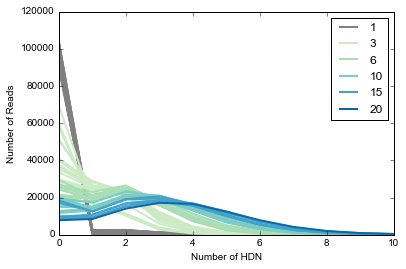

In [207]:

fig,ax = plt.subplots(1)

# ax.set_yscale('log')
cs = pal.colorbrewer.sequential.GnBu_6.hex_colors
lw=2
lines=[]
labels=[]
for key in ng01.keys():
    ng01[key].plot(x='hdn_count', y='n_reads', ax=ax, color='grey', legend=False, lw=lw, label=1)
for key in ng03.keys():
    ng03[key].plot(x='hdn_count', y='n_reads', ax=ax, color=cs[1], legend=False, lw=lw, label=3)
for key in ng06.keys():
    ng06[key].plot(x='hdn_count', y='n_reads', ax=ax, color=cs[2], legend=False, lw=lw, label=6)
for key in ng10.keys():
    ng10[key].plot(x='hdn_count', y='n_reads', ax=ax, color=cs[3], legend=False, lw=lw, label=10)
for key in ng15.keys():
    ng15[key].plot(x='hdn_count', y='n_reads', ax=ax, color=cs[4], legend=False, lw=lw, label=15)
for key in ng20.keys():
    ng20[key].plot(x='hdn_count', y='n_reads', ax=ax, color=cs[5], legend=False, lw=lw, label=20)



In [214]:
ngs20 = import_hdncsv_folder('ng-shuffle-20')
ngs25 = import_hdncsv_folder('ng-shuffle-25')
ngs30 = import_hdncsv_folder('ng-shuffle-30')


In [215]:
ngs30

{'out-30-1':     hdn_count  n_reads
 0           0     7270
 1           1     7347
 2           2    12274
 3           3    15690
 4           4    16135
 5           5    13288
 6           6     9230
 7           7     5451
 8           8     2894
 9           9     1440
 10         10      720
 11         11      346
 12         12      206
 13         13      163
 14         14       93
 15         15       88
 16         16       57
 17         17       42
 18         18       29
 19         19       33
 20         20       16
 21         21       19
 22         22       11
 23         23        8
 24         24        9
 25         25        4
 26         27        1
 27         28        5
 28         29        1, 'out-30-10':     hdn_count  n_reads
 0           0     7726
 1           1     6081
 2           2     9840
 3           3    13233
 4           4    15409
 5           5    14351
 6           6    11431
 7           7     7619
 8           8     4728
 9           9 

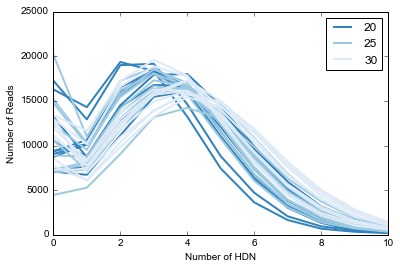

In [223]:
fig,ax2 = plt.subplots(1)

# ax.set_yscale('log')
cs = pal.colorbrewer.sequential.Blues_3_r.hex_colors
lw=2
lines=[]
labels=[]
for key in ngs20.keys():
    ngs20[key].plot(x='hdn_count', y='n_reads', ax=ax2, color=cs[0], legend=False, lw=lw, label=20)
for key in ngs25.keys():
    ngs25[key].plot(x='hdn_count', y='n_reads', ax=ax2, color=cs[1], legend=False, lw=lw, label=25)
for key in ngs30.keys():
    ngs30[key].plot(x='hdn_count', y='n_reads', ax=ax2, color=cs[2], legend=False, lw=lw, label=30)

lines, labels = ax2.get_legend_handles_labels()    
# get_labels
lset=list(set(labels))
lset.sort(key=int)
label=[]
line=[]
for l in lset:
    i=labels.index(l)
    label+=[labels[i]]
    line+=[lines[i]]
ax2.legend(line, label)

ax2.set_xlim([0,10])
ax2.set_xlabel('Number of HDN')
ax2.set_ylabel('Number of Reads')

